### Introducción
● Con la regresión logística obtenemos. 𝑃𝑟(𝑦 ∈ 𝑌|𝑋) generando un modelo que
modelaba la distribución de y condicional a los predictores 𝑋.

● De similar manera a cómo generamos clases a partir de la distribución de los
atributos 𝑋 a partir de cada clase 𝑦 ∈ 𝑌 y posteriormente implementamos el
Teorema de Bayes para extraer 𝑃𝑟(𝑦 ∈ 𝑌|𝑋) mediante el Análisis Lineal
Discriminante.

● Si asumimos que las distribuciones de los atributos tienen una distribución normal
𝑃𝑟(𝑋|𝑦 ∈ 𝑌) ∼ el modelo será muy similar a una regresión logística.

### Distribución multivariada normal
● Para entender el Análisis Lineal Discriminante es necesario abordar uno de sus
componentes principales, la distribución multivariada normal. Ésta es una
generalización de la distribución normal cuando trabajamos con un vector de
atributos 𝑥 ∈ 𝑋 con 𝑁 − 𝑑𝑖𝑚𝑒𝑛𝑠𝑖𝑜𝑛𝑒𝑠.

Los parámetros a ingresar son un vector de medias μ 𝑁 − 𝑑𝑖𝑚𝑒𝑛𝑠𝑖𝑜𝑛𝑎𝑙 y una matriz
de covarianza Σ con dimensiones 𝑁 𝑥 𝑁.

● Ésta última debe ser simétrica (cuya transposición Σ𝑇es igual a la original Σ y
definida positiva (si para todo vector 𝑣∈𝐶𝑁 se cumple que el producto matricial
𝑣𝑇Σ𝑣 > 0.

Otra forma de verificar si una matriz definida positiva es comprobando que todos sus
valores propios λΣ > 0.

● Su función de densidad se expresa de la siguiente forma:

$$ MultiNominal(\mu, \Sigma) = \frac{1}{2\pi^{n/2}|\Sigma|^{1/2}} \exp \left[- \frac{1}{2}(x-\mu)^T \Sigma^-1(x_\mu)\right]$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lec4_graphs as gfx
import classmodelsdiag as cmd

import warnings

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

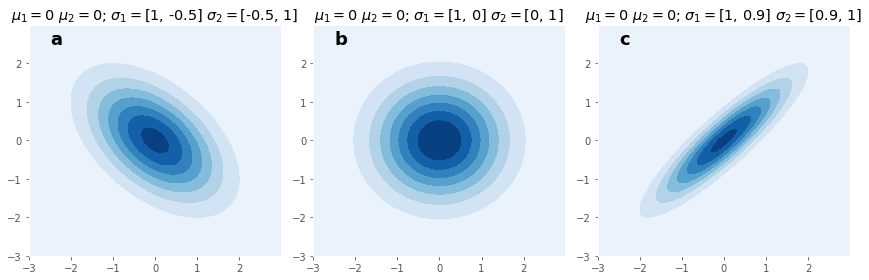

In [2]:
plt.figure(figsize=(12, 4))
gfx.plot_mvn()
plt.tight_layout()

● En la función gfx.plot_mvn() visualizamos distintos contornos de la función de
densidad detallada arriba.

● La figura a representa una distribución donde las medias de los vectores están
centrados en 0. En este punto se encontrará la mayor densidad de los casos
(denotada con un azul intenso). La dirección de la relación está determinada por los
elementos fuera de la diagonal principal de Σ (en este caso -.5).

● La figura b representa el símil de la distribución estandarizada normal donde la
densidad del contorno tiene una forma circular, en comparación a las demás figuras
donde la forma es elipsoidal.

● La figura c representa una distribución donde la dirección está dada por los
elementos fuera de la diagonal principal. En este caso, como los valores son
sustancialmente altos (-.9), la densidad del contorno está más pronunciada hacia el
centro de los vectores.

● Resulta que hemos trabajado con esta distribución antes, sólo que no la habíamos
presentado formalmente. Una de sus virtudes es que permite resumir de una manera
tangible la correlación entre dos variables al considerar cuál es el valor medio de
ambas. Este atributo la transforma en una buena candidata para resumir el
comportamiento de los datos condicionales al grupo, objetivo de los algoritmos de
aprendizaje generativos.

### La idea base del algoritmo LDA
● A continuación se presenta los pasos del Análisis Lineal Discriminante con 𝑌 = 2.
La exposición de este caso es dado su relativa simplicidad y facilidad de generalizar
el procedimiento cuando 𝑌 ≥ 2.

● Para ello implementaremos una serie de gráficos que se encuentran en la función
gfx.plot_lda_sequence que presenta de una forma visual el proceso generativo
del Análisis Lineal Discriminante.


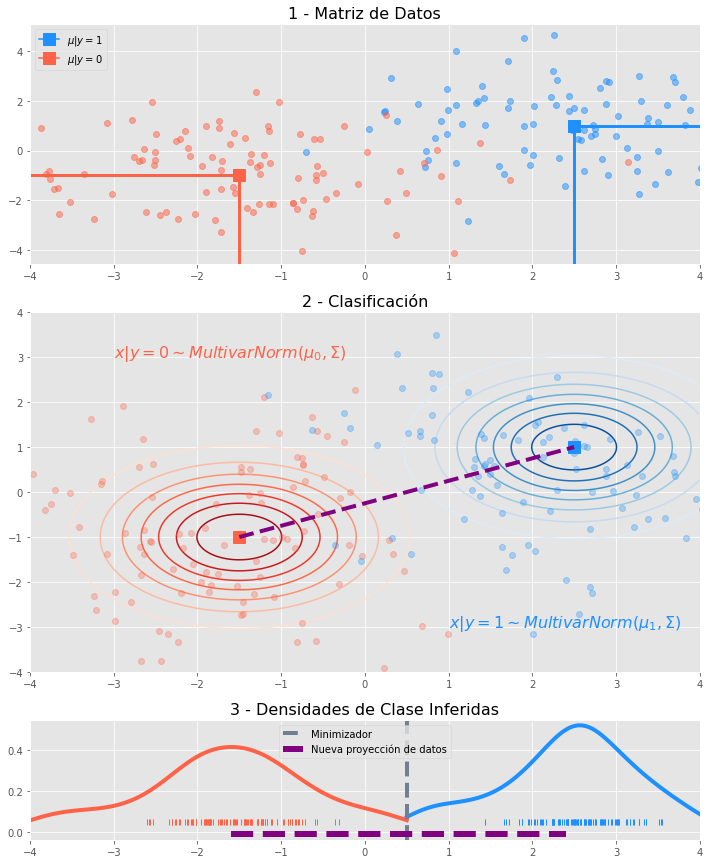

In [3]:
plt.figure(figsize=(12, 15))
gfx.plot_lda_sequence()


#### El algoritmo se puede segmentar en tres grandes pasos:

1.

Extraer los vectores μ para cada clase 𝑦 ϵ 𝑌

● Recordemos las principales características del Análisis Lineal Discrminante: es un
algoritmo supervisado (tenemos conocimiento previo sobre la existencia de las
clases 𝑦 ϵ 𝑌y generativo (buscamos aprender sobre las clases a partir de la
distribución de los atributos 𝑋. Esto se visualiza de mejor manera con la figura 1 del
gráfico.

● En esta etapa buscamos las medias μ de cada atributo condicional a la pertenencia
de los datos a cada clase. Cada vector de medias μ tendrá dos valores
representativos para cada atributo en el gráfico.

2.

Estimar las densidades para cada cl ase 𝑦 ϵ 𝑌siguiendo una distribución multivariada normal
𝑥 | 𝑦 ∈ 𝑌 ∼ 𝑀𝑢𝑙𝑡𝑖𝑣𝑎𝑟𝑁𝑜𝑟𝑚(μ, Σ)

● En el segundo gráfico se genera la diagramación de cada densidad. A partir de la
estimación de las medias para cada clase, estimamos la función de densidad
multivariada normal para cada una. Uno de los aspectos a considerar en esta etapa,
es que la matriz de covarianza Σ se asume idéntica para ambas funciones de
densidad multivariada, por lo que las elipses tienen la misma forma.

● En base a las elipses buscamos evaluar la varianza interna de cada clase, así como
la varianza externa entre clases, representada con la recta púrpura trazada en la zona
de mayor densidad de cada distribución. Resulta que la varianza externa es una
reducción de dimensiones entre las dos clases. Parte del proceso del Análisis Lineal
Discriminante es implementar esta dimensión para reescalar las observaciones
empíricas del punto 1 para maximizar la separación. Generalmente esta varianza
externa se rota para clarificar la división entre puntos.

3.

En base a las densidades de clase inferidas, seleccionar un discriminante lineal que permita
reescalar las muestras en un nuevo espacio.

● En base a la maximización de la varianza externa entre las clases, buscamos un
discriminante lineal que reduzca la sobreposición de las observaciones de cada
clase. Para clasificar una nueva observación debemos calcular la probabilidad
posterior de ésta en cada una de las clases 𝑃𝑟(𝑦 ∈ 𝑌| 𝑥).

La probabilidad de las nuevas observaciones viene dada por las distribuciones
multivariadas normales, se asigna la clase de aquella con mayor probabilidad
mediante el Teorema de Bayes.

● La recta gris es el discriminante lineal, que funciona como una frontera de decisión
ante los puntajes predichos por el modelo.

● Para el caso de un atributo en el modelo, los puntajes predichos obtienen de:

$$ \widehat{\delta}_y(x) = x \cdot \frac{\widehat{\mu}_y}{\widehat{\sigma}^2} - \frac{\widehat{\mu}_y}{2 \widehat{\sigma}^2} + log(\widehat{\pi}_y)$$

Donde estimamos δ𝑘(𝑥) el puntaje de una observación específica en cada clase y. Por cada
clase se estima un μ𝑦 el valor promedio de las las observaciones en esa clase específica, así
como su varianza σ .2
Como LDA es un modelo generativo que hace uso de información previa, ésta se considera
en π𝑦(la probabilidad observada en los datos de obtener cada clase).

### Implementando un LDA con sklearn
● Para implementar el modelo, utilizaremos la clase LinearDiscriminantAnalysis
dentro del módulo discriminant_analysis de la librería sklearn. Como el
algoritmo LDA es un problema de clasificación supervisada dado que tenemos
conocimiento sobre la cantidad de clases y en un espacio finito Y, debemos importar
de manera adicional las métricas de desempeño más comunes como
roc_auc_score, roc_curve, confusion_matrix y classification_report.

● Para esta lectura trabajaremos con la conocida base de datos iris, donde Ronald
Fisher aplicó por primera vez el Análisis Linear Discriminante en su paper The use of
multiple measurements in taxonomic problems. Los datos de la base son 50
muestras de tres especies de flores Iris (setosa, virginica y versicolor, dando un total
de 150 observaciones. Por cada una de ellas, se registraron cuatro atributos: El
ancho y largo de los sépalos y pétalos. En base a la combinación de estos atributos,
Ronald Fisher desarrolló un modelo discriminante para diferenciar cada especie.

Comencemos por incluir las librerías típicas del análisis e importar la base de datos iris.csv:


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# botamos la columna de index
df = pd.read_csv('Datasets/iris.csv').drop(columns = 'Unnamed: 0')

In [6]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# guardamos las etiquetas de cada clase para posterior uso.
target_label = df['Species'].unique()
target_label

array(['setosa', 'versicolor', 'virginica'], dtype=object)

● Cada una de las columnas hace referencia al largo y ancho de los Sépalos y Pétalos
de cada flor, medida en centímetros. Solicitemos una serie de histogramas por cada
variable, representando cada clase.

● Uno de los primeros puntos a considerar es que el ancho y largo de los Sépalos
presentan una superposición importante de valores entre sí. Esto levanta indicios
que pueden ser atributos con un bajo nivel de discriminación. Este punto lo
volveremos a tomar más adelante.


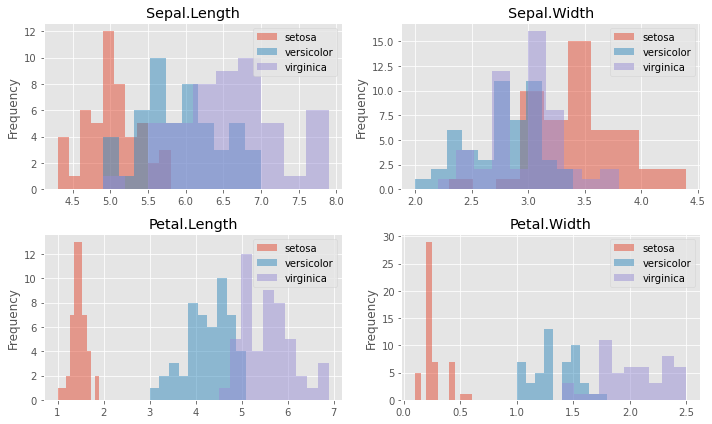

In [8]:
plt.figure(figsize=(10, 6))
for n, i in enumerate(df.drop(columns = 'Species').columns):
    plt.subplot(2, 2, n + 1)
    df.groupby('Species')[i].plot(kind='hist', alpha=.5)
    plt.legend(df['Species'].unique())
    plt.title(i)
    plt.tight_layout()

In [9]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [10]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])
X_train_mat, X_test_mat, y_train_vec, y_test_vec = train_test_split(df.loc[:, 'Sepal.Length':'Petal.Width'], df['Species'], test_size = .33, random_state = 15820)

El siguiente paso es generar una instancia del clasificador. La documentación hace a una
serie de hiperparámetros, de los cuales consideramos tres como relevantes:

1. priors: Permite ingresar la probabilidad a priori para cada clase en el algoritmo de
entrenamiento. Éstos deben ser ingresados como una lista especificando la
probabilidad entre 0 y 1 para cada clase. Por defecto es None. Pueden referirse a la
lectura de Bayes Ingenuo para ver algunos enfoques sobre las probabilidades a
priori.

2. tol: Criterio de tolerancia para la decomposición de valores singulares. Por lo
general este no suele modificarse, salvo en contadas ocasiones. Una de ellas es
cuando el algoritmo no alcance la decomposición, para lo cual se podría disminuir el
umbral de tolerancia para analizar soluciones tentativas. Un punto a destacar es que
la tolerancia por defecto 1. 0𝑒 − 4 ya es relativamente baja, en comparación a los
umbrales de tolerancia en otros métodos de solución como la máxima verosimilitud
(donde por defecto se asume que es 1. 0𝑒 − 6.

3. n_components: Cantidad de discriminantes lineales a estimar. Por defecto el método
estima que el número de discriminantes lineales a estimar es 1 − 𝑁 . 𝑌
Existen otros hiperparámetros como el método de solución (solver) que recomendamos no
modificar sin motivos de peso.
Nuestro primer modelo tomará los argumentos por defecto. Partimos por instanciar un
objeto y posteriormente implementar el método .fit donde ingresamos nuestra matriz de
atributos y vector objetivo.

#### Digresión: Sobre los parámetros que "se recomienda no modificar":
A estas alturas del curso probablemente se hayan encontrado varias veces con ciertos tipos
de parámetros en algunos modelos que no ocupamos y que tienen nombres interesantes,
como solver o tol (tolerancia). Una duda razonable es preguntarse si quizás modificando
de alguna forma estos pseudo-hiperparámetros se podría obtener un mejor modelo. Antes
de dar la respuesta a esa pregunta tenemos que entender la naturaleza de estos tipos de
parámetros.

Todo modelo de aprendizaje estadístico utilizado hasta ahora proviene de librerías que ya
los tienen implementados, por lo que nunca vemos en realidad como es calculado
computacionalmente nuestro modelo (es distinto a como lo calculamos en el papel, no
basta tener la función objetivo solamente). Cuando uno de nuestros modelos es entrenado,
se generan muchos cálculos matriciales con nuestra matriz de atributos, descomposiciones
de matrices e iteraciones para encontrar mínimos/máximos de funciones.

Muchas veces el problema en cuestión se reduce a encontrar la solución a un sistema
matricial (similar a la forma que tiene una ecuación de primer grado: Ax=b) mal
condicionado. Para resolverlo hacemos uso de derivadas matriciales y operaciones
matriciales, las cuales son costosas en términos computacionales y sólo pueden aumentar
en su costo en la medida que ingresamos más datos.

El parámetro solver especifica el método numérico para calcular la solución al sistema.
Mediante la especificación de este en un modelo, podemos obtener estimaciones con un
mayor grado de eficiencia. Por ejemplo, cuando implementamos modelos con matrices
dispersas, el solver por defecto liblinear será mucho más lento que sag o saga.

El parámetro tol regula la optimización de la función objetivo. Dado que buscamos que el
algoritmo alcance un mínimo/máximo, la manera más aceptada des mediante la
aproximación iterativa. Por cada paso que mi algoritmo vuelva a iterar, éste se acercará a un
mínimo/máximo. Si tenemos un punto (que representa nuestro estimador) que se acerca
cada vez más al punto de inflexión de la función objetivo, llegará una situación donde la
diferencia entre el punto y el mínimo/máximo de esa función será casi indistinguible.

Mediante la tolerancia podemos ingresar un umbral que ordene la detención del algoritmo
posterior a ese punto.

Finalmente, para responder la pregunta planteada al inicio: No, modificar estos valores (a
menos que sean casos de borde) no permite mejorar el modelo en sí mismo, la razón está
en que el problema no cambia, solo cambia la forma en la que encontramos la solución o el
nivel de exactitud de la solución. De todas formas este es un tema interesante que, les guste
o no, tendremos que volver a ver hacia el final del curso cuando veamos redes neuronales.


In [11]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_mat, y_train_vec)
LinearDiscriminantAnalysis(n_components = None, priors = None, shrinkage=None,solver = 'svd', store_covariance = False, tol = 0.0001)

LinearDiscriminantAnalysis()

● En base a este objeto instanciado podemos extraer información sobre el porcentaje
de casos en cada clase estimada con priors_, las medias de cada atributo en cada
clase means_ y la varianza explicada por cada uno de los discriminantes lineales
estimados.

● Un aspecto a considerar es en las medias de cada clase es la similitud de atributos
entre las últimas dos, correspondientes a versicolor y virginica.

● Dado que no conocíamos información a priori sobre la probabilidad de ocurrencia de
cada clase, el modelo las asumió a partir de los datos observados.

In [12]:
print(f'''Probabilidades a priori
{lda_model.priors_}

Medias de atributos en cada clase
{lda_model.means_.round(2)}

Varianza explicada por cada discriminante
{lda_model.explained_variance_ratio_.round(2)}
''')

Probabilidades a priori
[0.37 0.3  0.33]

Medias de atributos en cada clase
[[4.99 3.42 1.42 0.22]
 [5.97 2.79 4.24 1.36]
 [6.68 2.97 5.61 2.01]]

Varianza explicada por cada discriminante
[1. 0.]



● Mediante lda_model.coef_ podemos extraer información sobre la combinación
lineal de parámetros que se implementaron para generar las fronteras de decisión.

In [13]:
lda_model.coef_

array([[  5.06879883,  11.23750647, -13.61675846, -24.9159067 ],
       [ -1.40619211,  -4.71275318,   4.15898011,   6.55717739],
       [ -4.40484222,  -8.31530739,  11.48638363,  21.97494625]])

● Como todo modelo de predicción establecido desde el aprendizaje de máquinas,
nuestro objetivo es medir el desempeño. Para ello implementamos un par de
funciones de diagnóstico gráfico en nuestro archivo auxiliar.

● Comencemos por realizar las predicciones de clase (las predicciones a realizar son
exactamente las mismas para la mayoría de los modelos de clasificación).


In [14]:
lda_class_pred = lda_model.predict(X_test_mat)
lda_class_pred[:20]

array([2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0])

● Ahora implementaremos una matriz de confusión con
gfx.plot_confusion_matrix. El gráfico muestra que el modelo clasifica
correctamente todas las observaciones setosa, pero presenta complicaciones
respecto a la clasificación entre versicolor y virginica.

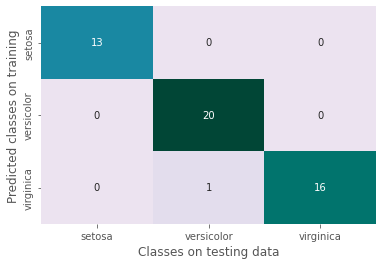

In [15]:
gfx.plot_confusion_matrix(y_test_vec, lda_class_pred, classes_labels=target_label)

● Solicitamos las medidas de Precision, Recall y F1 para cada una de las clases. De
igual manera a como lo hicimos con la matriz de confusión, tenemos una función
que reporta de forma gráfica las métricas para cada una de las clases y el promedio
general del clasificador.

● La línea roja representa el promedio general de cada una de las métricas. Para este
caso es de .94, lo cual refleja un nivel adecuado de clasificación. Resulta que si
comparamos las métricas respecto a esta media, observamos que hay situaciones
donde las clases versicolor y virginica tienen un desempeño inferior a la media.

● Las observaciones clasificadas como versicolor presentan un desempeño inferior
respecto a la precisión de las predicciones, por lo que falla en predecir
correctamente las etiquetas positivas. Las observaciones clasificadas como
virginica presentan un desempeño inferior respecto al recall de las predicciones, por
lo que su desempeño de identificar verdaderos positivos respecto a las predicciones
correctas es inferior al desempeño general del modelo.

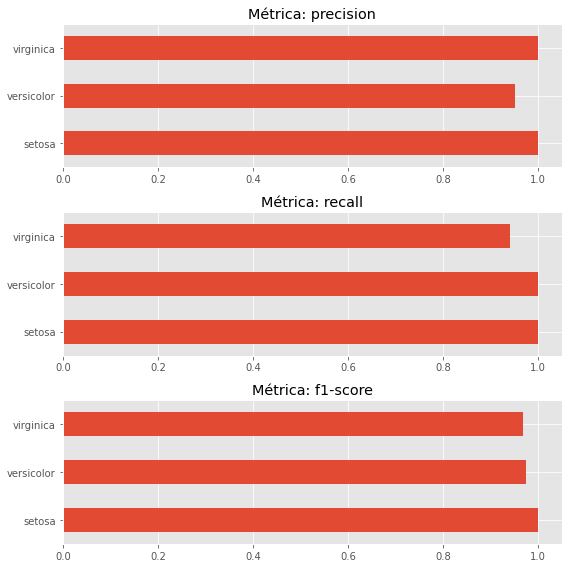

In [16]:
plt.figure(figsize = (8, 8))
gfx.plot_class_report(y_test_vec, lda_class_pred, classes_labels = target_label)

● Otro de los aspectos relevantes a considerar en la clasificación multiclases realizada
con LDA son las fronteras de decisión. Para ello implementamos la función
gfx.probability_contours que visualiza cuáles son los rangos de clasificación
entre dos atributos.

● Si bien la limitante de este ejercicio es que impide incluir más de 2 variables, es un
buen aproximado para tener un conocimiento tangible del modelo. La función acepta
una clase sklearn que representa un modelo, una matriz de atributos y un vector
objetivo donde buscar los atributos específicos x1 y x2 a analizar.


Text(0.5, 1.0, 'Ancho y Largo de Pétalos')

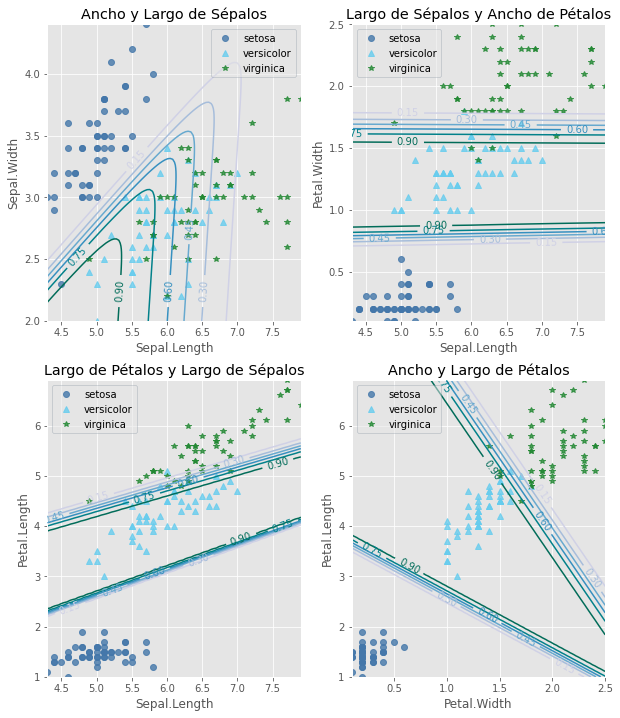

In [17]:
x_mat = df.loc[:, 'Sepal.Length':'Petal.Width']
y_vec = df['Species']
plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
gfx.probability_contours(LinearDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Sepal.Width', classes_labels=target_label)
plt.title('Ancho y Largo de Sépalos')
plt.subplot(2, 2, 2)
gfx.probability_contours(LinearDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Petal.Width', classes_labels=target_label)
plt.title('Largo de Sépalos y Ancho de Pétalos')
plt.subplot(2, 2, 3)
gfx.probability_contours(LinearDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Petal.Length', classes_labels=target_label)
plt.title('Largo de Pétalos y Largo de Sépalos')
plt.subplot(2, 2, 4)
gfx.probability_contours(LinearDiscriminantAnalysis(),x_mat,y_vec, 'Petal.Width', 'Petal.Length', classes_labels=target_label)
plt.title('Ancho y Largo de Pétalos')

● Si nos fijamos respecto al gráfico de Ancho y Largo de Sépalos, observamos que el
modelo tiene dificultades en reconocer más de una dimensión discriminante. Separa
bien los casos setosa, pero es incapaz de diferenciar versicolor de virginicas.
Volviendo al análisis exploratorio, observamos que en los histogramas para estas
variables hay una superposición importante entre estas dos clases para el ancho y
largo de los sépalos.

● Cuando incluímos información sobre los pétalos, el modelo mejora sustancialmente
en la capacidad de reconocer = 𝑁 clases, lo que conlleva a la división mediante dos 𝑌
discriminantes lineales.


#### Análisis Cuadrático Discriminante
● A diferencia de LDA, donde Σ se asume constante para cada clase 𝑦 ϵ 𝑌 en el análisis
cuadrático discriminante asume que los atributos de la matriz de datos se
distribuyen de forma multivariada normal condicional a las clases. Así, cada clase a
estimar su densidad multivariada dependerá de una matriz de covarianza específica
a la clase.

● Para implementar un Análisis Cuadrático Discriminante importamos la clase
QuadraticDiscriminantAnalysis dentro del módulo discriminant_analysis de
la librería sklearn.

● De similar manera, los parámetros priors y tol se manejan de similar manera que
en la versión Lineal. El parámetro reg_params permite regularizar (mediante Elastic
Net) que penaliza la covarianza estimada.

In [18]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train_mat, y_train_vec)
qda_class_pred = qda_model.predict(X_test_mat)

● El nuevo clasificador mejora las clasificaciones en la tercera clase, pero erra en una
(lo observado es 1 y lo predicho es 2). A grandes rasgos el desempeño del modelo
predictivo aumenta.

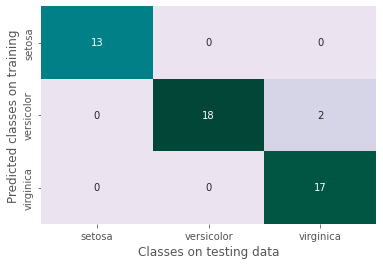

In [22]:
gfx.plot_confusion_matrix(y_test_vec, qda_class_pred, classes_labels=target_label)

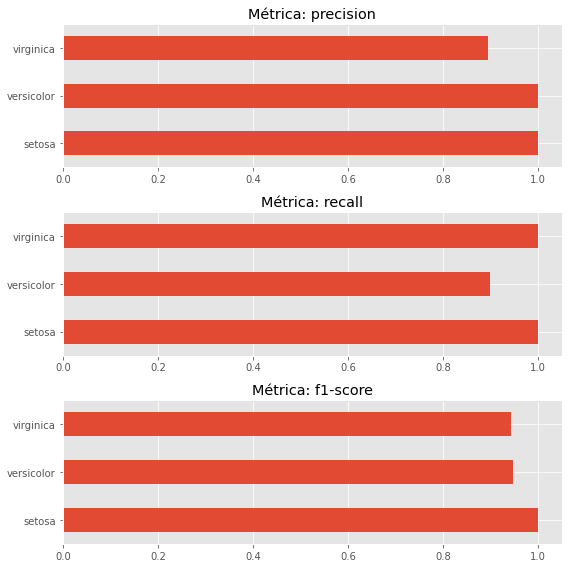

In [20]:
plt.figure(figsize=(8, 8))
gfx.plot_class_report(y_test_vec,qda_class_pred, classes_labels=target_label)

Text(0.5, 1.0, 'Ancho y Largo de Pétalos')

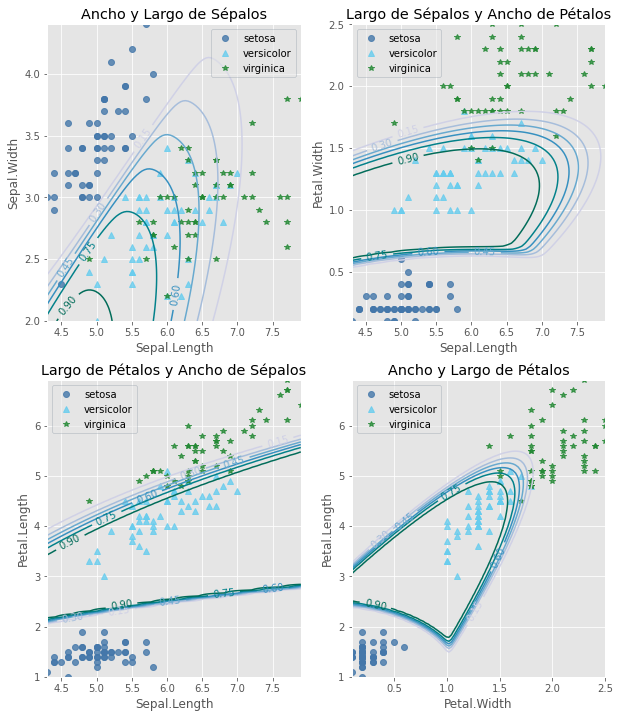

In [21]:
x_mat = df.loc[:, 'Sepal.Length':'Petal.Width']
y_vec = df['Species']
plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
gfx.probability_contours(QuadraticDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Sepal.Width', classes_labels=target_label)
plt.title('Ancho y Largo de Sépalos')
plt.subplot(2, 2, 2)
gfx.probability_contours(QuadraticDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Petal.Width', classes_labels=target_label)
plt.title('Largo de Sépalos y Ancho de Pétalos')
plt.subplot(2, 2, 3)
gfx.probability_contours(QuadraticDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Petal.Length', classes_labels=target_label)
plt.title('Largo de Pétalos y Ancho de Sépalos')
plt.subplot(2, 2, 4)
gfx.probability_contours(QuadraticDiscriminantAnalysis(),x_mat,y_vec, 'Petal.Width', 'Petal.Length', classes_labels=target_label)
plt.title('Ancho y Largo de Pétalos')

● Tal como lo dice el algoritmo, la principal característica del algoritmo cuadrático es
que genera discriminantes cuadráticos. Esto se aprecia en los gráficos de contorno
de probabilidad generados arriba.

● Este comportamiento es posible dado que relajamos el supuesto de la covarianza
compartida para cada clase estimada. Para los casos donde incluímos el Largo de
Sépalos y Ancho de Pétalos, así como en el caso de Ancho y Largo de Pétalos, se
observa que el contorno predicho se adapta de mejor manera a las observaciones.

### Apreciaciones
● A continuación se detallan algunos vínculos existentes entre los modelos
generativos LDA, PCA y Regresión Logística.

Análisis Lineal Discriminante vs Análisis de Componentes Principales

![](Fotos/PCA_LDA.jpg)

● El análisis lineal discriminante y el análisis de componentes principales son
transformaciones lineales que permiten reexpresar un nuevo espacio lineal para
reducir la cantidad de dimensiones. Una de las principales diferencias es la
naturaleza del entrenamiento.

● PCA es un método no supervisado que no adquiere información sobre las clases en
una matriz de datos, por lo que busca maximizar la varianza dentro de ésta.

● En contraparte, LDA busca maximizar la varianza externa entre cada clase (también
conocida como los componentes lineales). Para lograr esto se vale de información
dada sobre la pertenencia de cada observación en las clases.

● Por lo general, LDA presenta mejores resultados cuando buscamos colapsar los
atributos en función de las clases existentes. PCA se puede implementar como un
paso previo para reducir la dimensionalidad, antes de asignar clases en base a la
maximización de la varianza.

#### Análisis Lineal Discriminante vs Regresión Logística
● La regresión logística es menos exigente y más robusta a variados casos que LDA.
Aún así, si se cumplen las condiciones de normalidad multivariada, LDA será
asintóticamente eficiente, permitiendo mejores clasificaciones con un menor tamaño
del training set (en comparación a la regresión logística y otros métodos).

#### Referencias
● Hastie, T; Tibshirani, T; Friedman, J. 2008. The Elements of Statistical Learning: Data
Mining, Inference, and Prediction. Springer Series in Statistics. Springer. Ch4: Linear
Methods for Classification.

● Murphy, K. 2012. Machine Learning: A Probabilistic Perspective. Cambridge, MA:
Massachusetts Institute of Technology Press. Ch4: Gaussian models.